In [1]:
import convexgating as cg
import scanpy as sc
import anndata as ann
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import datetime
import os
import re

def get_subsample_fraction(adata,cluster_string,target_cluster,subsample_factor):
    adata_target = adata[adata.obs[cluster_string] == target_cluster]
    adata_rest = adata[adata.obs[cluster_string] != target_cluster]
    sc.pp.subsample(adata_rest,n_obs = 15*len(adata_target))
    adata_sub = adata_rest.concatenate(adata_target)
    return adata_sub

sc.logging.print_versions()
sc.settings.verbosity = 3 
now = datetime.datetime.now()
today = now.strftime("%Y%m%d")

df_anno = pd.read_csv('./data_Tcells_annotated.csv')
var_names = ['CD45',
       'CD3', 'CD19', 'CD15', 'CD8', 'TCRgd', 'CD62L', 'CD45RO', 'CD28',
       'CD27', 'CD226', 'ICOS', 'PD1', 'Lag3', 'TIGIT', 'CD96', 'CD25', 'CD56',
       'HLADR', 'CD38', 'CD137', 'CD69', 'Ki67', 'CXCR3', 'CXCR5', 'CCR6',
       'CRTH2', 'KLRB1', 'KLRG1', 'KLRF1', 'CD95', 'CD10', 'CD16', 'CD34',
       'CD123', 'CD11c', 'CD21', 'CD14', 'IgD', 'IgM']
adata_anno = ann.AnnData(X=df_anno[var_names], obs= df_anno[['cellid', 'Run', 'FCS.Filename', 'id', 'Individuals', 'Group',
       'Severity', 'Disease.phase', 'max. WHO scale', 'sev_merge',
       'Days.post.symptom.onset', 'Week', 'sev_week', 'followup', 'Tcellcompartment',
       'pheno_acute', 'metacluster_num', 'metacluster_name', 'new_clust_name',
       'new_clust_num']]) 

df_umap = df_anno[['UMAP1', 'UMAP2']]
df_umap.index = adata_anno.obs_names
adata_anno.obsm['X_umap'] = df_umap.to_numpy()

cofactor = 5
adata_anno.X = adata_anno.X/cofactor
adata_anno.X = np.arcsinh(adata_anno.X)

#----------------------------------------------------------------------------------------
adata_CV19 = adata_anno[adata_anno.obs['Group'] == 'CV19']

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asttokens                   NA
backcall                    0.2.0
cffi                        1.15.0
colorama                    0.4.4
convexgating                NA
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.2
google                      NA
h5py                        3.7.0
igraph                      0.9.11
ipykernel                   6.9.0
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
joblib                      1.1.0
kiwisolver                  1.4.4
llvmlite                    0.39.0
louvain                     0.7.1
matplotlib                  3.5.2
mpl_toolkits                NA
natsort                     8.1.0
numba       

In [2]:
import json
with open('/work/users/mh823zote/projects/gating/data/CITEseq_Covid/data/07_intersect_AB_cytof_FACS.json', 'r') as f:
    FACS_panel = json.load(f)

In [3]:
adata_CV19 = adata_CV19[:,FACS_panel]

## cluster C8

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.447938     0.586642     0.565897     0.523133     0.514883
recall        0.629209     0.558811     0.498470     0.442501     0.419764
precision     0.347753     0.617391     0.654420     0.639697     0.665742


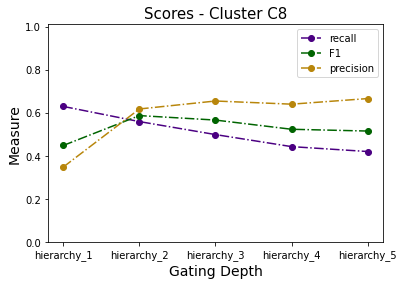

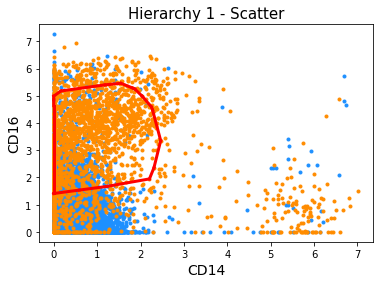

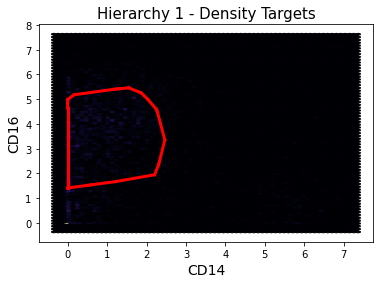

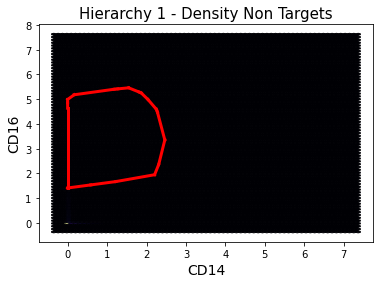

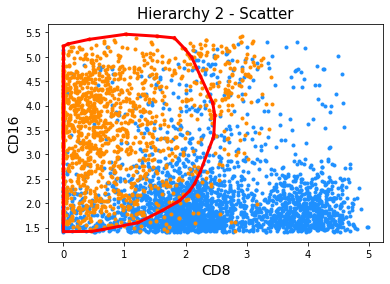

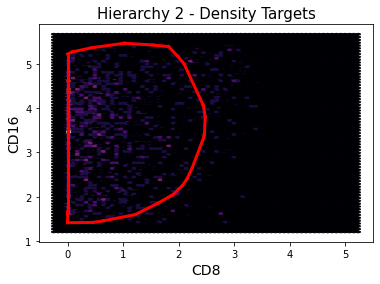

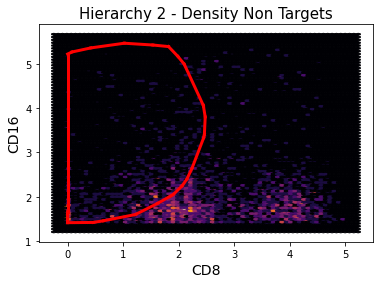

In [5]:
cluster_string = 'new_clust_num'
subsample_factor = 15
target_cluster = 'C8'
adata_C8 = get_subsample_fraction(adata_CV19,cluster_string,target_cluster,subsample_factor)
cg.tools.gating_strategy(adata_C8,[target_cluster],cluster_string = cluster_string,add_noise = True)

# cluster C26

           hierarchy_1  hierarchy_2  hierarchy_3  hierarchy_4  hierarchy_5
f1            0.684960     0.715256     0.682519     0.674525     0.656817
recall        0.727578     0.649103     0.595291     0.577354     0.548206
precision     0.647059     0.796424     0.799699     0.811024     0.819095


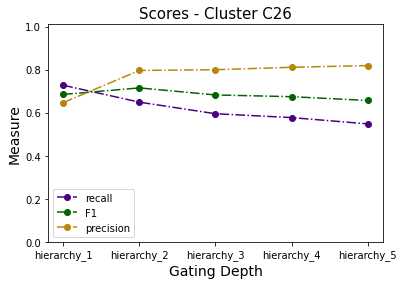

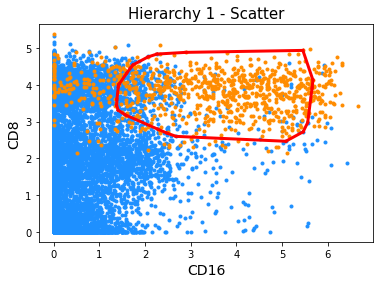

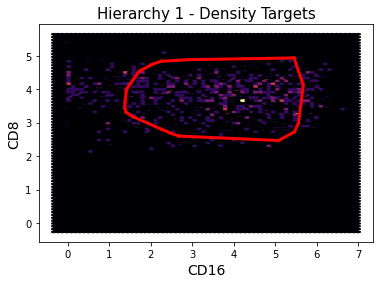

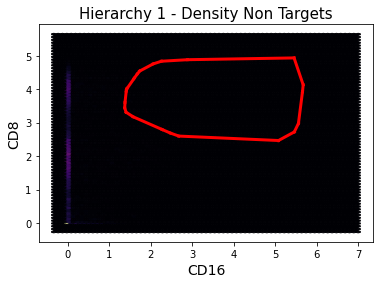

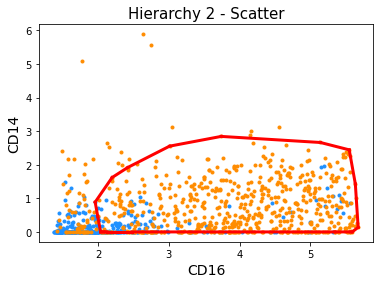

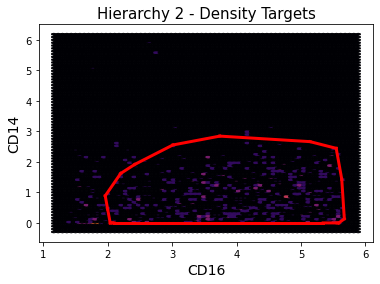

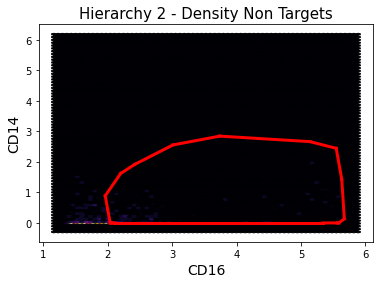

In [6]:
cluster_string = 'new_clust_num'
subsample_factor = 15
target_cluster = 'C26'
adata_C26 = get_subsample_fraction(adata_CV19,cluster_string,target_cluster,subsample_factor)
cg.tools.gating_strategy(adata_C26,[target_cluster],cluster_string = cluster_string,add_noise = True)